In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dsdl
import numpy.random
import math

In [2]:
DATASETS = ['a1a', 'mushrooms', 'a6a', 'w1a', 'w5a', 'ionosphere']
METHODS = ['SGD', 'AdaSpider', 'Spider', 'SpiderBoost', 'SVRG', 'AdaGrad', 'AdaSVRG']

In [3]:
def get_data_method():
    data = []
    for _ in range(100):
        data.append(np.mean(np.random.standard_normal(size=(20, ))))
    return data

# Get Data

# Logistic regression

In [4]:
# import methods to test
from src.optimizers.sgd import sgd
from src.logistic_regression.gradient import gradient

a1a


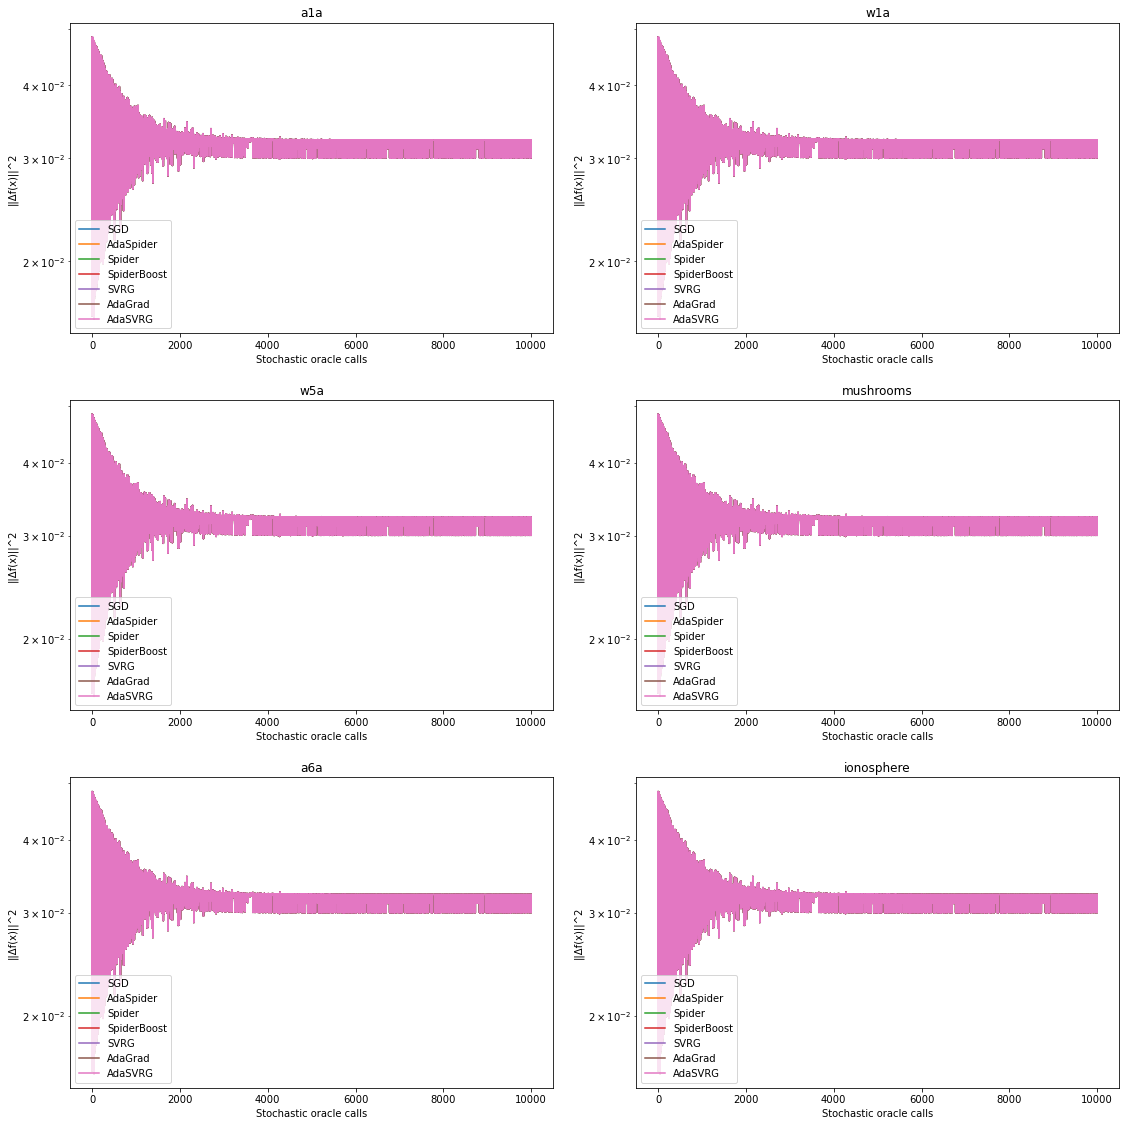

In [28]:
def test_method(method: object,
                max_iter: int,
                gamma: float):
    gradients = list()


    for dataset in DATASETS:
        print(dataset)
        ds = dsdl.load(dataset)
        X, y = ds.get_train()
        X = X.toarray()
        # build model
        N = len(X)
        tx = np.c_[np.ones(N), X]

        N = y.shape[0]
        D = tx.shape[1]
        w=np.array([0.0]*D)  # initial weights

        iter_num = 0
        while iter_num < max_iter:
            gradient = sgd(y, tx, w)
            w = w - gamma*gradient

            gradient_norm = np.linalg.norm(gradient, 2)
            gradients.append(gradient_norm)
            iter_num += 1

        return gradients

gradients = test_method(sgd, 10000, 0.05)
plot_data(gradients)

### Plot

In [26]:
def plot_data(gradients):
    # Write your code to make 4x4 panel here
    X_LABEL = "Stochastic oracle calls"
    Y_LABEL = "||\u0394f(x)||^2"

    fig, ax = plt.subplots(3,2,figsize=(16,16), sharey=False, sharex=False)

    for i, dataset_name in enumerate(DATASETS):
        sbplt = ax[i%3, i%2]
        for method in METHODS:
            sbplt.plot(gradients, label=method)

        sbplt.set_yscale('log')
        sbplt.set_title(dataset_name)
        sbplt.set_xlabel(X_LABEL)
        sbplt.set_ylabel(Y_LABEL)
        sbplt.legend(loc='lower left')

    fig.tight_layout(pad=2.0)
    # fig.savefig('tests_logistic_regression.jpg', dpi=150)